In [1]:
import cv2
import cv_exp.basic
import cv_exp.basic as cv
import cv_exp.pupil_detection as pupil_detection
import cv_exp.draw as draw
import cv_exp.log as log
import cv_exp.take as take
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from PIL import Image
import pandas as pd
from scipy.cluster.vq import kmeans, vq


2022-03-24 11:18:50.273345: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:

model_face_detection = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_detection_front.tflite'
model_face_landmarks ='/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_landmark.tflite'
model_iris_landmarks = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/iris_landmark.tflite'

iris_detector = pupil_detection.IrisDetectorMP(model_face_detection_path=model_face_detection,
                                                   model_face_landmarks_path=model_face_landmarks,
                                                   model_iris_landmarks_path=model_iris_landmarks)

2022-03-24 11:18:54.965420: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-24 11:18:54.992760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 11:18:54.993067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-03-24 11:18:54.993163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 11:18:54.993430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID

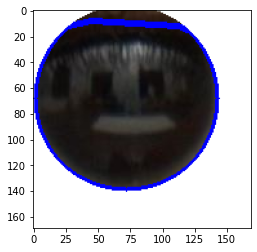

In [3]:
import matplotlib.pyplot as plt
import plotly.express as px

# def Mediapipe_Iris_Color(path):
#     '''
#     This function takes the image in path and Using Mediapipe calculates the Annular Mask of the images,
#     then calculates the HSV color of Annular mask.
#     and returns the dominant Iris colour percentage in a data frame.
#     '''

path='/home/roopesh/Desktop/New_Corpus/Brown/front (3).jpg'
image = cv2.imread(path)

#     plt.imshow(image)
#     plt.show()

# conversion numpy array into rgb image to show


image_bgr_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # converting from BGR to RGB

out = image_bgr_rgb.copy()
out_pupile = image_bgr_rgb.copy()

result = iris_detector.detect(image_bgr_rgb)

if not result is None:

    detected_pupils = result.detected_pupils,
    face_rect_detection = result.face_rect_detection_from_landmarks,
    face_rect_landmarks = result.face_rect_from_landmarks,
    face_landmarks = result.face_landmarks,
    face_rect_detection_from = result.face_rect_from_detection,
    face_landmarks_from_detection = result.face_landmarks_from_detection,
    left_iris_landmarks = result.left_iris_landmarks,
    left_eyelid_landmarks = result.left_eyelid_landmarks,
    right_iris_landmarks = result.right_iris_landmarks,
    right_eyelid_landmarks = result.right_eyelid_landmarks,
    left_iris_segmentation = result.left_iris_segmentation,
    right_iris_segmentation = result.right_iris_segmentation,
    eyes_landmarks = result.eyes_landmarks

    #         out_pupile_ = draw.draw_pupils(out_pupile, result.detected_pupils.left, result.detected_pupils.right, color_center = (255, 255, 255), color_contour = (255, 255, 255))
    #         out_pupile_ = draw.draw_rect(out_pupile_, result.face_rect_detection_from_landmarks, thickness=2, color=(255, 0, 0))
    #         out_pupile_ = draw.draw_list_pointd(out_pupile_, result.left_iris_landmarks,radius=3,color = (255, 255, 255))

    out_= draw.draw_contour(out, result.left_iris_segmentation,  thickness=4,color=(0, 0, 255))
    #             fig=px.imshow(out_, title='Out Image -Iris Segmentation')
    
    # flattening tuple of tuples of left iris landmarks into a list

    left_iris_tuple_of_tuple_Tolist = ([PointD_elements for PointD in left_iris_landmarks for PointD_elements in PointD])

    # Extraction of Points From LEFT IRIS Landmarks: Left Iris from Coder's Point of view

    left_iris_points = [(pointD.x, pointD.y) for pointD in left_iris_tuple_of_tuple_Tolist]

    center_point_LeftIris=(np.round(left_iris_points[0]))
    for left_x,left_y in [center_point_LeftIris]:
         lx, ly = left_x, left_y

    left_point_LeftIris=(np.round(left_iris_points[1]))
    for leftIris_left_x,LeftIris_left_y in [left_point_LeftIris]:
        LIL_x, LIL_y = leftIris_left_x, LeftIris_left_y

    right_point_LeftIris=(np.round(left_iris_points[3]))
    for rightIris_x,rightIris_y in [right_point_LeftIris]:
        RIL_x, RIL_y = rightIris_x, rightIris_y

    Top_point_LeftIris=(np.round(left_iris_points[2]))
    for TopIris_x,TopIris_y in [Top_point_LeftIris]:
        TI_x, TI_y = TopIris_x, TopIris_y

    Bottom_point_LeftIris=(np.round(left_iris_points[4]))
    for BottomIris_x,BottomIris_y in [Bottom_point_LeftIris]:
        BI_x, BI_y = BottomIris_x, BottomIris_y


    # Distance Formula to calculate the distance between center to left_Iris_ points to get radius of iris
    distance_left_iris_center = np.sqrt((lx - LIL_x) ** 2 + (ly - LIL_y) ** 2)

    # second Circular mask to take inner pupil area alone

    mask1 = np.zeros(out_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
    center1= (int(left_x),int(left_y))
    radius1 = (int((distance_left_iris_center)))      # to scrap pupil area and other reflection area
    left_mask1 = cv2.circle(mask1, center1, radius1, (255, 255, 255), -1 )
    result1 = cv2.bitwise_and(out_, left_mask1)  # subtracting white region over masked area
    result1[mask1==0] = 255                                 # adding background Color- white
    plt.imshow(result1)
    plt.show

    # Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

    x= int(RIL_x)       # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
    y= int(TI_y)     # y-axis --Landmarks points from top_ left of left iris, +3 for adjusting the size
    h= int(radius1*2.35)   # height --Radius of iris times 2.35,-3 for adjustment
    w=int(radius1*2.35)   # width  --Radius of iris times 2.35, -1 for adjustment
    crop1 = result1[y:y+h, x:x+w]


    plt.imshow(crop1)
    plt.show


In [6]:
new_crop= crop1.copy()


In [7]:
BGR2Grey = cv2.cvtColor(new_crop, cv2.COLOR_BGR2GRAY)

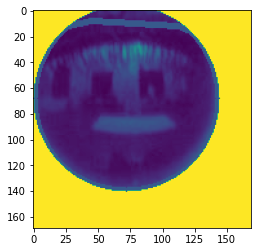

In [9]:
plt.imshow( BGR2Grey)
plt.show()

In [10]:
edged = cv2.Canny(BGR2Grey, 30, 200)

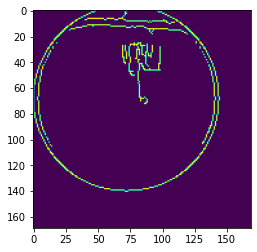

In [11]:
plt.imshow( edged )
plt.show()

In [14]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  

In [18]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

array([[[180, 195, 198],
        [180, 195, 198],
        [181, 196, 199],
        ...,
        [174, 187, 189],
        [174, 187, 189],
        [174, 187, 189]],

       [[180, 195, 198],
        [180, 195, 198],
        [181, 196, 199],
        ...,
        [175, 188, 190],
        [175, 188, 190],
        [175, 188, 190]],

       [[180, 195, 198],
        [180, 195, 198],
        [181, 196, 199],
        ...,
        [176, 189, 191],
        [176, 189, 191],
        [176, 189, 191]],

       ...,

       [[195, 206, 210],
        [196, 207, 211],
        [197, 208, 212],
        ...,
        [194, 199, 197],
        [193, 199, 194],
        [193, 198, 196]],

       [[195, 207, 209],
        [196, 208, 210],
        [198, 210, 212],
        ...,
        [193, 199, 194],
        [193, 200, 193],
        [193, 199, 194]],

       [[196, 208, 210],
        [197, 209, 211],
        [198, 210, 212],
        ...,
        [193, 200, 193],
        [193, 200, 193],
        [192, 199, 192]]

In [19]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 23


TypeError: Image data of dtype object cannot be converted to float

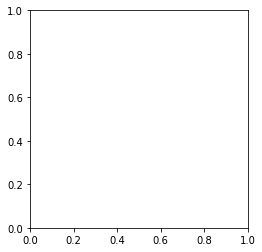

In [17]:
plt.imshow( contours )
plt.show()